In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:,[3,4]] #taking only 3rd and 4th columns as the other columns are not help in identifying clustering

In [5]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
from sklearn.cluster import k_means
from matplotlib import pyplot as plt

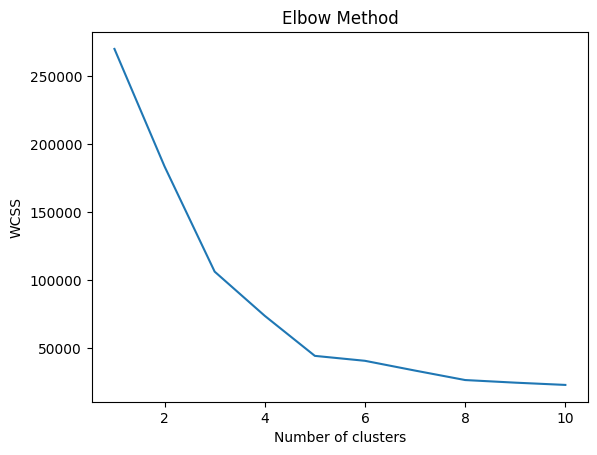

In [7]:
list1 = []
for i in range(1,11):
    centroid, label, inertia  = k_means(X,n_clusters=i,random_state=42)
    
    list1.append(inertia)

plt.plot(range(1,11),list1)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
    

In [8]:
print(list1)

[269981.28, 183653.32894736846, 106348.3730621112, 73880.64496247195, 44448.45544793371, 40825.16946386947, 33642.57922077922, 26686.83778518779, 24766.47160979344, 23103.122085983912]


In [16]:
centroid, label, inertia  = k_means(X,n_clusters=5,random_state=42)

In [17]:
supervised = pd.DataFrame(dataset)

In [18]:
supervised['cluster_group']=label

In [19]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [20]:
import seaborn as sns

In [21]:
supervised.columns[4]

'Spending Score (1-100)'

C:\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


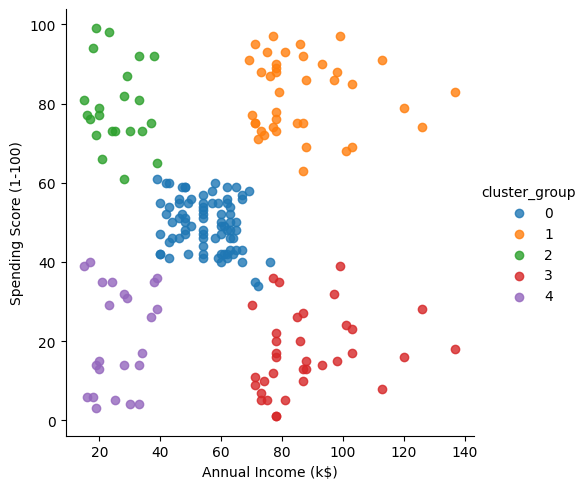

In [22]:
facet = sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)